In [7]:
import pandas as pd 
from datetime import datetime
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

In [276]:
data = pd.read_json('./datalake/input_to_model.json')

In [277]:
data['target'] = data['valor'].apply(lambda x: 1 if x>=150 else  0 )

In [278]:
data

,fecha,temp_out,hum_out,rainfall_mm,wind_speed_avg,wind_speed_hi,valor,sitio,target
0,2008-02-26,8.860417,53.791667,0.0,9.020833,88,33.0,20V (20V),0
1,2008-02-29,8.293478,27.369565,0.0,12.543478,61,13.0,20V (20V),0
2,2008-03-03,5.885417,53.729167,0.0,8.354167,62,6.0,20V (20V),0
3,2008-03-06,5.006250,15.437500,0.0,13.812500,53,38.0,20V (20V),0
4,2008-03-12,7.102083,25.625000,0.0,15.958333,77,19.0,20V (20V),0
...,...,...,...,...,...,...,...,...,...
2706,2022-09-26,1.970833,14.250000,0.0,16.979167,67,72.0,STO-D (STO-D),0
2707,2022-09-26,1.970833,14.250000,0.0,16.979167,67,124.0,OROS (OROS),0
2708,2022-09-26,1.970833,14.250000,0.0,16.979167,67,10.0,DOMO (DOMO),0
2709,2022-09-26,1.970833,14.250000,0.0,16.979167,67,46.0,OROS2 (OROS2),0


In [279]:
data.loc[data['valor']<=400]

,fecha,temp_out,hum_out,rainfall_mm,wind_speed_avg,wind_speed_hi,valor,sitio,target
0,2008-02-26,8.860417,53.791667,0.0,9.020833,88,33.0,20V (20V),0
1,2008-02-29,8.293478,27.369565,0.0,12.543478,61,13.0,20V (20V),0
2,2008-03-03,5.885417,53.729167,0.0,8.354167,62,6.0,20V (20V),0
3,2008-03-06,5.006250,15.437500,0.0,13.812500,53,38.0,20V (20V),0
4,2008-03-12,7.102083,25.625000,0.0,15.958333,77,19.0,20V (20V),0
...,...,...,...,...,...,...,...,...,...
2706,2022-09-26,1.970833,14.250000,0.0,16.979167,67,72.0,STO-D (STO-D),0
2707,2022-09-26,1.970833,14.250000,0.0,16.979167,67,124.0,OROS (OROS),0
2708,2022-09-26,1.970833,14.250000,0.0,16.979167,67,10.0,DOMO (DOMO),0
2709,2022-09-26,1.970833,14.250000,0.0,16.979167,67,46.0,OROS2 (OROS2),0


In [254]:
data = data.drop(['sitio', 'fecha', 'valor'], axis=1)

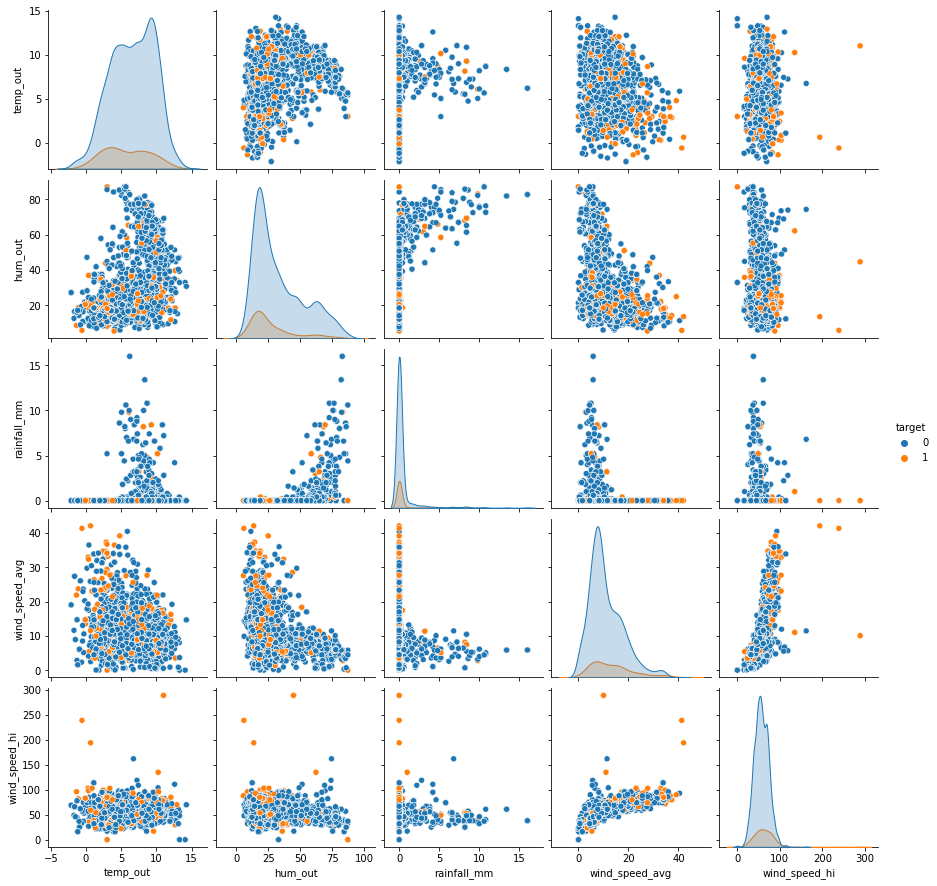

In [255]:
sns.pairplot(data, hue = 'target')

In [256]:
import matplotlib.pyplot as plt

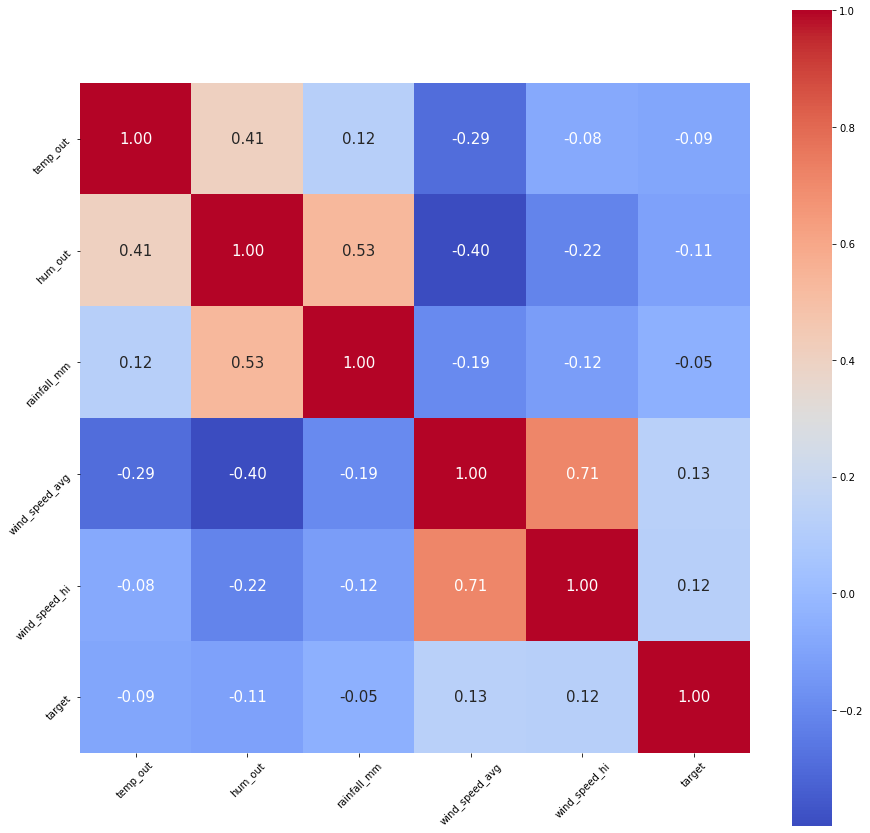

In [257]:
corr = data.corr()
plt.figure(figsize=(15,15))
sns.heatmap(corr, cbar = True,  square = True, annot=True, fmt= '.2f',annot_kws={'size': 15},
           xticklabels= data.columns, 
           yticklabels= data.columns,
           cmap= 'coolwarm')
plt.xticks(rotation = 45)
plt.yticks(rotation = 45)
plt.show()

In [15]:
from sklearn.preprocessing import StandardScaler

In [258]:
data

,temp_out,hum_out,rainfall_mm,wind_speed_avg,wind_speed_hi,target
0,8.860417,53.791667,0.0,9.020833,88,0
1,8.293478,27.369565,0.0,12.543478,61,0
2,5.885417,53.729167,0.0,8.354167,62,0
3,5.006250,15.437500,0.0,13.812500,53,0
4,7.102083,25.625000,0.0,15.958333,77,0
...,...,...,...,...,...,...
2706,1.970833,14.250000,0.0,16.979167,67,0
2707,1.970833,14.250000,0.0,16.979167,67,0
2708,1.970833,14.250000,0.0,16.979167,67,0
2709,1.970833,14.250000,0.0,16.979167,67,0


In [282]:
X = data.drop(['target'], axis=1)
y  = data['target']


#scl = StandardScaler()
#X = scl.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y )

In [18]:
y_test.value_counts()

0    702
1    112
Name: target, dtype: int64

In [19]:
print('Proporcion de etiquetas positiva en los datos de Train: ', y_train.sum()/y_train.size)
print('Proporcion de etiquetas positiva en los datos de Test: ', y_test.sum()/y_test.size)

Proporcion de etiquetas positiva en los datos de Train:  0.1370585134422773
Proporcion de etiquetas positiva en los datos de Test:  0.1375921375921376


In [20]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier

In [21]:
tree = DecisionTreeClassifier(max_depth = 3)
tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3)

In [22]:
# Predecimos sobre nuestro set de entrenamieto
y_train_pred = tree.predict(X_train)

# Predecimos sobre nuestro set de test
y_test_pred = tree.predict(X_test)

# Comaparamos con las etiquetas reales
print('Accuracy sobre conjunto de Train:', accuracy_score(y_train_pred,y_train))
print('Accuracy sobre conjunto de Test:', accuracy_score(y_test_pred,y_test))

Accuracy sobre conjunto de Train: 0.8687401159725883
Accuracy sobre conjunto de Test: 0.8611793611793612


In [23]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

In [24]:
# Predecimos sobre nuestro set de entrenamieto
y_train_pred = knn.predict(X_train)

# Predecimos sobre nuestro set de test
y_test_pred = knn.predict(X_test)

# Comaparamos con las etiquetas reales
print('Accuracy sobre conjunto de Train:', accuracy_score(y_train_pred,y_train))
print('Accuracy sobre conjunto de Test:', accuracy_score(y_test_pred,y_test))

Accuracy sobre conjunto de Train: 0.9246178176067475
Accuracy sobre conjunto de Test: 0.8132678132678133


In [25]:
from sklearn.model_selection import cross_val_score

In [26]:
tree = DecisionTreeClassifier()
tree_scores = cross_val_score(tree, X, y, cv=5)

knn = KNeighborsClassifier(n_neighbors=1)
knn_scores = cross_val_score(knn, X, y, cv=5)

In [27]:
print(tree_scores, knn_scores)
# print(tree_scores.mean(), knn_scores.mean())
print("Accuracy para Tree: %0.2f (+/- %0.2f)" % (tree_scores.mean(), tree_scores.std() * 2))
print("Accuracy para KNN: %0.2f (+/- %0.2f)" % (knn_scores.mean(), knn_scores.std() * 2))

[0.64640884 0.75276753 0.78597786 0.76568266 0.70479705] [0.67403315 0.70664207 0.75645756 0.7103321  0.68819188]
Accuracy para Tree: 0.73 (+/- 0.10)
Accuracy para KNN: 0.71 (+/- 0.06)


In [28]:
from sklearn.model_selection import cross_validate

In [29]:
tree_scores = cross_validate(tree, X, y, cv=5)
knn_scores = cross_validate(knn, X, y, cv=5)
print(tree_scores['test_score'])
print(knn_scores['test_score'])

In [30]:
print(tree_scores['test_score'])
print(knn_scores['test_score'])

[0.65745856 0.75092251 0.78413284 0.78228782 0.70479705]
[0.67403315 0.70664207 0.75645756 0.7103321  0.68819188]


In [31]:
scores_train = []
scores_test = []
profundidades = np.arange(1,50)
for max_depth in profundidades:
    clf = DecisionTreeClassifier(max_depth=max_depth, random_state=42)
    clf.fit(X_train, y_train)
    
    y_pred_train = clf.predict(X_train)
    y_pred_test = clf.predict(X_test)
    
    scores_train.append(accuracy_score(y_train, y_pred_train))
    scores_test.append(accuracy_score(y_test, y_pred_test))

scores_train = np.array(scores_train)
scores_test = np.array(scores_test)

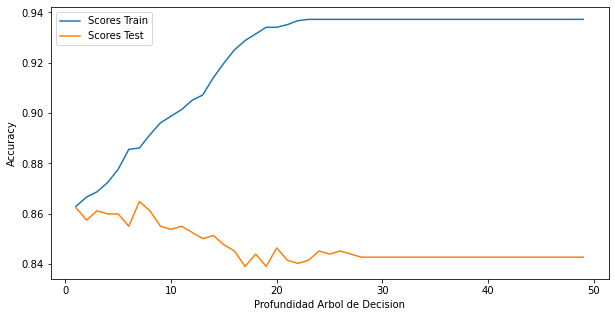

In [32]:
plt.figure(figsize=(10,5))
plt.plot(profundidades,scores_train, label = 'Scores Train')
plt.plot(profundidades,scores_test, label = 'Scores Test')
plt.legend()
plt.ylabel('Accuracy')
plt.xlabel('Profundidad Arbol de Decision')
plt.show()

In [33]:
tree_train_scores_mean = []
tree_train_scores_std = []
tree_test_scores_mean = []
tree_test_scores_std = []

profundidades = np.arange(1,50,1)

for profundidad in profundidades:
    clf = DecisionTreeClassifier(max_depth=profundidad)
    tree_scores = cross_validate(clf, X, y, cv=5, return_train_score=True, n_jobs = -1)
    
    tree_train_scores_mean.append(tree_scores['train_score'].mean())
    tree_train_scores_std.append(tree_scores['train_score'].std())
    
    tree_test_scores_mean.append(tree_scores['test_score'].mean())
    tree_test_scores_std.append(tree_scores['test_score'].std())

tree_train_scores_mean = np.array(tree_train_scores_mean)
tree_train_scores_std = np.array(tree_train_scores_std)
tree_test_scores_mean = np.array(tree_test_scores_mean)
tree_test_scores_std = np.array(tree_test_scores_std)

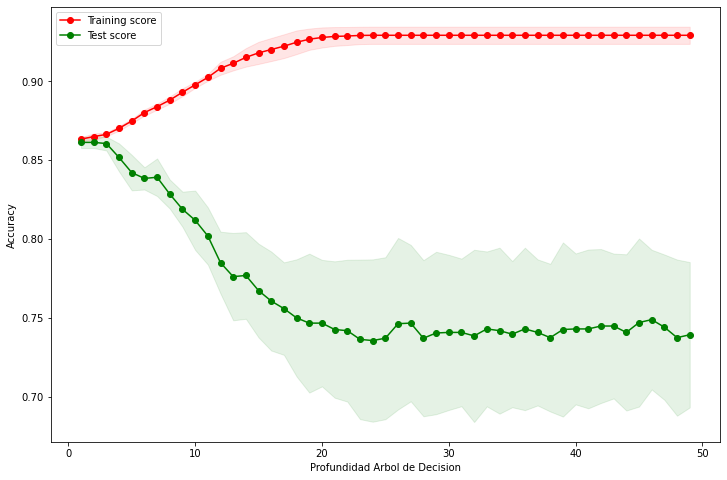

In [34]:
plt.figure(figsize=(12,8))
plt.fill_between(profundidades, tree_train_scores_mean - tree_train_scores_std,
                 tree_train_scores_mean + tree_train_scores_std, alpha=0.1,
                 color="r")
plt.fill_between(profundidades, tree_test_scores_mean - tree_test_scores_std,
                 tree_test_scores_mean + tree_test_scores_std, alpha=0.1, color="g")
plt.plot(profundidades, tree_train_scores_mean, 'o-', color="r",
         label="Training score")
plt.plot(profundidades, tree_test_scores_mean, 'o-', color="g",
         label="Test score")
plt.legend()
plt.ylabel('Accuracy')
plt.xlabel('Profundidad Arbol de Decision')
plt.show()

In [35]:
from scipy.stats import randint
from sklearn.model_selection import RandomizedSearchCV

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.30, random_state=42, stratify = y)
tree = DecisionTreeClassifier()
# Grilla para Grid Search
param_dist = {"max_depth": [3, 5, 10, 15],
              "max_features": randint(1, 3),
              "min_samples_leaf": randint(1, 9),
              "criterion": ["gini", "entropy"]}

# ESTRATEGIA 2: Random Search
model = RandomizedSearchCV(tree, param_dist, random_state=0, cv=5)

# Entrenamos: KNN con la grilla definida arriba y CV con tamaño de Fold=5
model.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=DecisionTreeClassifier(),
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [3, 5, 10, 15],
                                        'max_features': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7fe9b987a430>,
                                        'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7fe9b9976ee0>},
                   random_state=0)

In [36]:
print("Mejores parametros: "+str(model.best_params_))
print("Mejor Score: "+str(model.best_score_)+'\n')




Mejores parametros: {'criterion': 'gini', 'max_depth': 3, 'max_features': 1, 'min_samples_leaf': 2}
Mejor Score: 0.8639966671295654



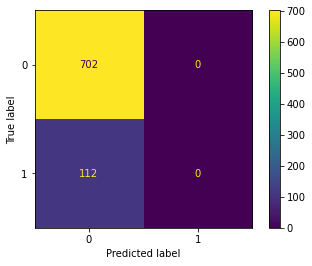

In [244]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix

y_test_pred = model.predict(X_test)
confusion_matrix(y_test, y_test_pred)
plot_confusion_matrix(model, X_test, y_test, values_format=".0f")

In [38]:
X_test.iloc[0,:]

temp_out           11.020833
hum_out            44.666667
rainfall_mm         0.000000
wind_speed_avg     10.041667
wind_speed_hi     289.000000
Name: 205, dtype: float64

In [39]:
X_test.sample(1).iloc[0,:].values.reshape(1,-1)

array([[ 8.79583333, 61.64583333,  3.        ,  8.75      , 53.        ]])

In [40]:
model.predict(X_test.sample(1).iloc[0,:].values.reshape(1,-1))

array([0])

In [42]:
from sklearn.ensemble import RandomForestClassifier

In [260]:
clf = RandomForestClassifier(n_estimators=100, max_features='sqrt', n_jobs=-1, oob_score = True, random_state = 42)
clf.fit(X_train,y_train)

RandomForestClassifier(max_features='sqrt', n_jobs=-1, oob_score=True,
                       random_state=42)

In [261]:

import sklearn.metrics as metrics

In [262]:
y_train_pred = clf.predict(X_train)
y_test_pred = clf.predict(X_test)
print(metrics.accuracy_score(y_train, y_train_pred))
print(metrics.accuracy_score(y_test, y_test_pred))

0.9372693726937269
0.8402948402948403


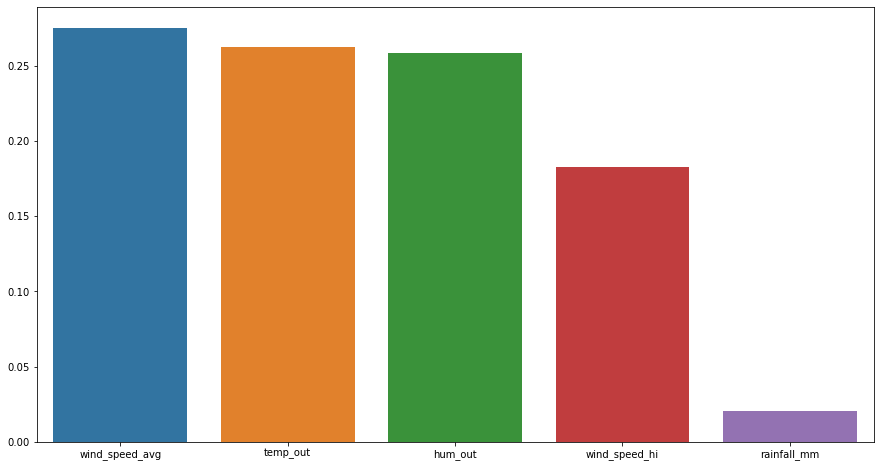

In [263]:

importances = clf.feature_importances_
columns = X_train.columns
indices = np.argsort(importances)[::-1]

plt.figure(figsize = (15,8))
sns.barplot(columns[indices], importances[indices])
plt.show()

In [49]:
from sklearn.model_selection import GridSearchCV

In [51]:
import warnings

warnings.filterwarnings('ignore')

In [285]:
X.shape

(2711, 19)

In [286]:
forest_params = [{'max_depth': list(range(10, 15)), 'max_features': list(range(0,19))}]
rfc = RandomForestClassifier()
clf = GridSearchCV(rfc, forest_params, cv = 10, scoring='accuracy')

clf.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=RandomForestClassifier(),
             param_grid=[{'max_depth': [10, 11, 12, 13, 14],
                          'max_features': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11,
                                           12, 13, 14, 15, 16, 17, 18]}],
             scoring='accuracy')

In [287]:
print(clf.best_params_)

print(clf.best_score_)

{'max_depth': 10, 'max_features': 2}
0.8661069340016707


In [288]:
clf.best_estimator_

RandomForestClassifier(max_depth=10, max_features=2)

In [116]:
import _pickle as cPickle

In [289]:
y_train_pred = clf.best_estimator_.predict(X_train)
y_test_pred = clf.best_estimator_.predict(X_test)
print(metrics.accuracy_score(y_train, y_train_pred))
print(metrics.accuracy_score(y_test, y_test_pred))

0.8956246705324196
0.85995085995086


In [114]:
from datetime import timedelta

In [115]:
datetime.now()- timedelta(days=1)

datetime.datetime(2022, 11, 26, 21, 10, 55, 524051)

In [241]:
y_train_pred = clf.predict(X_train)
y_test_pred = clf.predict(X_test)
print(metrics.accuracy_score(y_train, y_train_pred))
print(metrics.accuracy_score(y_test, y_test_pred))

0.9109119662625198
0.855036855036855


In [242]:
confusion_matrix(y_test, y_test_pred)

array([[686,  16],
       [102,  10]])

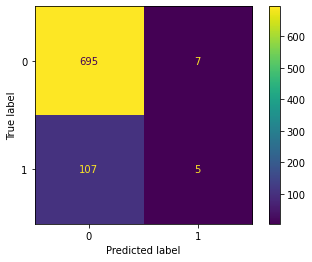

In [290]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix

y_test_pred = clf.predict(X_test)
confusion_matrix(y_test, y_test_pred)
plot_confusion_matrix(clf, X_test, y_test, values_format=".0f")

In [137]:
X_test

,temp_out,hum_out,rainfall_mm,wind_speed_avg,wind_speed_hi
205,11.020833,44.666667,0.0,10.041667,289
1776,2.810417,18.604167,0.0,17.916667,70
264,1.635417,13.395833,0.0,19.166667,85
297,5.597917,18.000000,0.0,9.854167,62
1025,7.800000,69.937500,1.6,5.583333,40
...,...,...,...,...,...
2263,2.191667,21.833333,0.0,4.145833,33
2206,2.268750,36.041667,0.0,31.291667,95
2355,7.475000,64.687500,3.2,11.354167,56
1438,9.808333,20.104167,0.0,14.750000,72


In [239]:
value = X_test.sample(1).iloc[0,:].values.reshape(1,-1)
print(value)
print(clf.predict(value))

print(pd.DataFrame(clf.predict_proba(value)))

[[ 2.11041667 57.89583333  0.          7.8125     57.        ]]
[0]
          0         1
0  0.966858  0.033142


In [95]:
pip install xgboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 10.2 MB/s eta 0:00:00 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [96]:
from xgboost import XGBClassifier

In [97]:
estimator = XGBClassifier(
    objective= 'binary:logistic',
    nthread=4,
    seed=42
)

In [98]:
parameters = {
    'max_depth': range (2, 10, 1),
    'n_estimators': range(60, 220, 40),
    'learning_rate': [0.1, 0.01, 0.05]
}

In [99]:
grid_search = GridSearchCV(
    estimator=estimator,
    param_grid=parameters,
    scoring = 'roc_auc',
    n_jobs = 10,
    cv = 10,
    verbose=True
)

In [101]:
grid_search.fit(X_train, y_train)

Fitting 10 folds for each of 96 candidates, totalling 960 fits


[Parallel(n_jobs=10)]: Using backend LokyBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done  30 tasks      | elapsed:    7.5s
[Parallel(n_jobs=10)]: Done 180 tasks      | elapsed:   42.9s
[Parallel(n_jobs=10)]: Done 430 tasks      | elapsed:  2.1min
[Parallel(n_jobs=10)]: Done 780 tasks      | elapsed:  3.9min
[Parallel(n_jobs=10)]: Done 960 out of 960 | elapsed:  5.1min finished


GridSearchCV(cv=10,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None...
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                   

In [102]:
grid_search.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.05, max_bin=256,
              max_cat_threshold=64, max_cat_to_onehot=4, max_delta_step=0,
              max_depth=9, max_leaves=0, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=180, n_jobs=4, nthread=4,
              num_parallel_tree=1, predictor='auto', ...)

In [103]:
y_train_pred = grid_search.best_estimator_.predict(X_train)
y_test_pred = grid_search.best_estimator_.predict(X_test)
print(metrics.accuracy_score(y_train, y_train_pred))
print(metrics.accuracy_score(y_test, y_test_pred))

0.9261992619926199
0.8476658476658476
